In [525]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns

# 한글폰트설치
from matplotlib import font_manager, rc
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 표시
plt.rc('font', family = 'Malgun Gothic')

# 티켓가격 vs 소비자물가지수 비교

### 소비자물가지수 (오락 및 문화)

In [526]:
consumerPrice = pd.read_excel('Data/[KOSIS] 지출목적별_소비자물가지수_품목포함__2020100__20230515104059.xlsx')
consumerPrice.head()

c:\python38\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도별,지출목적별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,...,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04
0,전국,0 총지수,98.106,98.855,98.751,98.931,98.979,98.779,98.590,99.462,...,108.74,108.62,108.93,109.21,109.10,109.28,110.10,110.38,110.56,110.80
1,NaN,01 식료품 및 비주류음료,93.324,96.027,94.486,94.962,94.073,92.866,93.148,98.026,...,113.12,114.69,116.30,114.77,112.41,113.49,115.40,115.84,116.34,115.67
2,NaN,02 주류 및 담배,99.070,99.167,98.983,99.109,98.964,98.935,99.128,99.109,...,103.08,103.17,103.00,103.08,103.04,103.09,103.00,103.22,103.30,103.32
3,NaN,03 의류 및 신발,98.501,99.092,99.178,99.187,99.206,99.226,99.111,99.111,...,103.59,103.69,103.71,103.93,107.33,107.56,107.86,107.94,108.28,108.30
4,NaN,"04 주택, 수도, 전기 및 연료",97.852,98.404,98.569,98.549,98.530,98.452,96.903,97.145,...,106.80,106.99,108.49,110.71,110.65,110.77,111.96,112.55,112.16,112.18


In [527]:
consumerPrice.drop(['시도별'],axis = 1, inplace = True)
cp = consumerPrice.T
cp.columns = cp.iloc[0]
cp.drop(['지출목적별'], inplace = True)
cp.head()

지출목적별,0 총지수,01 식료품 및 비주류음료,02 주류 및 담배,03 의류 및 신발,"04 주택, 수도, 전기 및 연료",05 가정용품 및 가사 서비스,06 보건,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2018.01,98.106,93.324,99.07,98.501,97.852,96.489,98.714,102.789,104.9,99.351,100.856,95.865,95.787
2018.02,98.855,96.027,99.167,99.092,98.404,97.262,98.753,103.059,104.763,100.755,101.139,96.216,96.157
2018.03,98.751,94.486,98.983,99.178,98.569,97.961,98.849,102.989,104.669,100.448,101.431,96.531,96.382
2018.04,98.931,94.962,99.109,99.187,98.549,97.514,98.426,102.709,105.173,102.011,101.636,96.9,96.617
2018.05,98.979,94.073,98.964,99.206,98.53,98.222,98.406,103.619,105.057,102.199,101.675,97.233,96.572


In [530]:
# 오락 및 문화 분야 소비자물가지수
entertain_cp = cp.iloc[:,9]
et_cp = entertain_cp.to_frame()
et_cp.columns = [['entertain_price']]
et_cp.head()

,entertain_price
2018.01,99.351
2018.02,100.755
2018.03,100.448
2018.04,102.011
2018.05,102.199


### 티켓가격

In [532]:
ticketPrice = pd.read_excel('Data/afterpreprocessing/TicketPrice.xlsx')
ticketPrice.head()

,Unnamed: 0,cgv_min,cgv_median,cgv_max,cgv_mode,lotte_min,lotte_median,lotte_max,lotte_mode,mega_min,mega_median,mega_max,mega_mode
0,2018-01-01,6000,10000,11000,11000,6000,9000,11000,11000,5000,9000,36000,9000
1,2018-02-01,5000,10000,11000,10000,5500,9000,11000,9000,5000,9000,36000,9000
2,2018-03-01,6000,10000,11000,11000,6000,9000,11000,11000,5000,9000,36000,9000
3,2018-04-01,4000,9000,11000,10000,5000,9000,11000,9000,4000,9000,36000,9000
4,2018-05-01,6000,11000,14000,12000,6300,10000,12000,12000,4000,10000,36000,11000


In [533]:
ticketPrice = ticketPrice.set_index(ticketPrice['Unnamed: 0'])
ticketPrice.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [534]:
ticketMode = ticketPrice.iloc[:,3::4]
ticketMin = ticketPrice.iloc[:,::4]
ticketMedian = ticketPrice.iloc[:,1:14:4]
ticketMax = ticketPrice.iloc[:,2::4]

In [535]:
# 티켓 월별 최빈값
tm = ticketMode.copy()
tm['mean'] = tm.mean(axis = 1)
tm['trans_mean'] = tm['mean'] / (tm['mean'].iloc[24:36,].mean()/100)   # 2020년 평균을 100으로 변환

# 티켓 월별 최대값
tmax = ticketMax.copy()
tmax['mean'] = tmax.mean(axis = 1)
tmax['trans_mean'] = tmax['mean'] / (tmax['mean'].iloc[24:36,].mean()/100)

# 티켓 월별 최소값
tmin = ticketMin.copy()
tmin['mean'] = tmin.mean(axis = 1)
tmin['trans_mean'] = tmin['mean'] / (tmin['mean'].iloc[24:36,].mean()/100)

# 티켓 월별 중앙값
ticketMedian = ticketPrice.iloc[:,1:14:4]
tmed = ticketMedian.copy()
tmed['mean'] = tmed.mean(axis = 1)
tmed['trans_mean'] = tmed['mean'] / (tmed['mean'].iloc[24:36,].mean()/100)

In [540]:
# 2020년 평균지수 100 확인 
(tmax['mean'].iloc[24:36,].mean()/100), (tmax['trans_mean'].iloc[24:36,].mean())
(tm['mean'].iloc[24:36,].mean()/100), (tm['trans_mean'].iloc[24:36,].mean())
(tmin['mean'].iloc[24:36,].mean()/100), (tmin['trans_mean'].iloc[24:36,].mean())
(tmed['mean'].iloc[24:36,].mean()/100), (tmed['trans_mean'].iloc[24:36,].mean())

# 오락_문화 분야 물가지수 2020년 평균도 100확인
et_cp.entertain_price.iloc[24:36].mean()

entertain_price    100.000833
dtype: object

### 시각화) 티켓가격 vs 오락문화 물가지수 단순비교

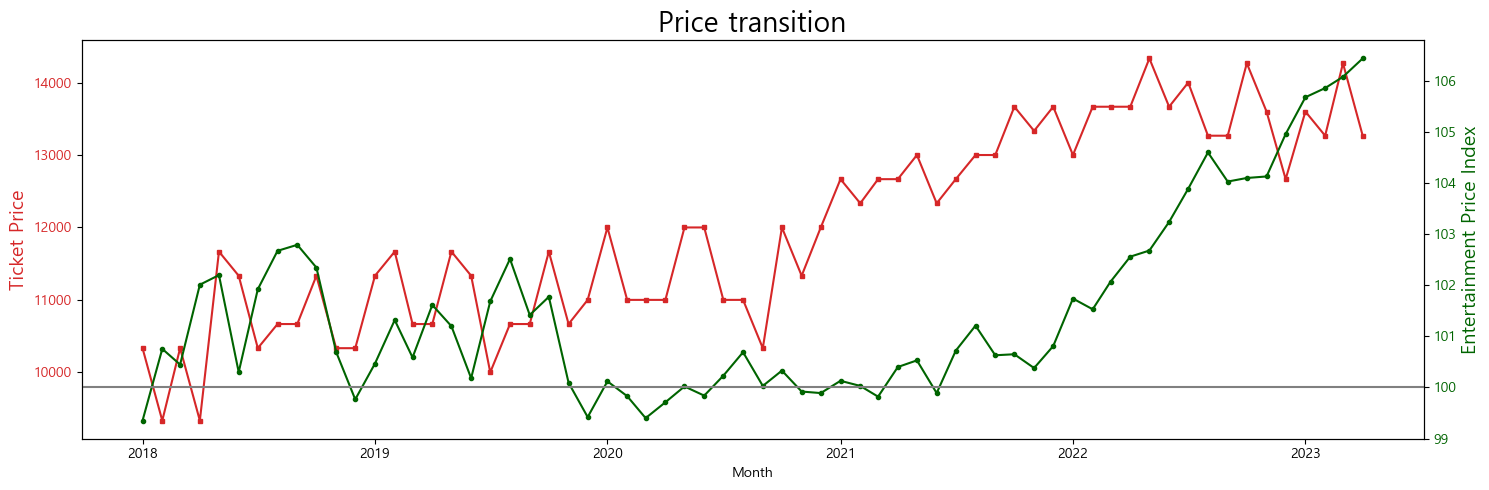

In [541]:
fig = plt.figure(figsize = (15,5))

# 티켓가격 추이
ax1 = plt.subplot()
color_1 = 'tab:red'
ax1.set_title('Price transition', fontsize = 20)
ax1.set_xlabel('Month')
ax1.set_ylabel('Ticket Price', fontsize = 14, color = color_1)
ax1.plot(tm.index, tm['mean'], color = color_1, marker='s', markersize=3)
ax1.tick_params(axis = 'y', labelcolor = color_1)

# 오락문화 물가지수 추이
ax2 = ax1.twinx()
color_2 = 'darkgreen'
ax2.set_ylabel('Entertainment Price Index', fontsize = 14, color = color_2)
ax2.plot(tm.index, et_cp.entertain_price, color = color_2, marker = 'o', markersize=3)
ax2.tick_params(axis = 'y', labelcolor = color_2)

# 기준지수: 100
plt.axhline(100, color = 'gray', linestyle = 'solid')

fig.tight_layout()
plt.show()

### 시각화) 티켓가격 vs 오락문화 물가지수, 2020년도 평균=100 환산 비교

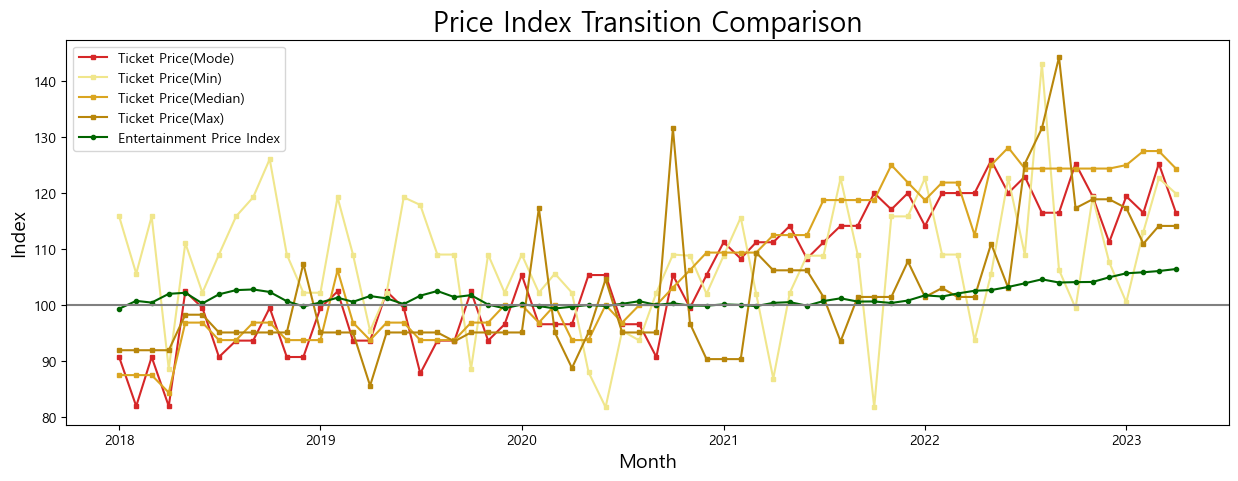

In [542]:
fig = plt.figure(figsize = (15,5))

# 티켓가격 추이
ax1 = plt.subplot()
ax1.set_title('Price Index Transition Comparison', fontsize = 20)
ax1.set_xlabel('Month', fontsize = 14)
ax1.set_ylabel('Index', fontsize = 14)
ax1.plot(tm.index, tm['trans_mean'], color = 'tab:red', marker='s', markersize=3)
ax1.plot(tm.index, tmin['trans_mean'], color = 'khaki', marker='s', markersize=3)
ax1.plot(tm.index, tmed['trans_mean'], color = 'goldenrod', marker='s', markersize=3)
ax1.plot(tm.index, tmax['trans_mean'], color = 'darkgoldenrod', marker='s', markersize=3)
# ax1.tick_params(axis = 'y', labelcolor = color_1)

# 오락문화 물가지수 추이
ax1.plot(tm.index, et_cp.entertain_price, color = 'darkgreen', marker = 'o', markersize=3)

# 기준지수: 100 (2020년 평균)
plt.axhline(100, color = 'gray', linestyle = 'solid')

plt.legend(['Ticket Price(Mode)','Ticket Price(Min)', 'Ticket Price(Median)','Ticket Price(Max)','Entertainment Price Index'])
# fig.tight_layout()
plt.show()